In [6]:
import pandas as pd
import os
import numpy as np

In [11]:
def read_transducer_csv(path: str):
    return pd.read_csv(path, dtype={'Name': 'category'})

df4 = read_transducer_csv("../data/Transducer_ExpFrame4TrainsNoDelays.log")
df4Delay = read_transducer_csv("../data/Transducer_ExpFrame4TrainsWithDelays.log")
df6 = read_transducer_csv("../data/Transducer_ExpFrame6TrainsNoDelays.log")
df6Delay = read_transducer_csv("../data/Transducer_ExpFrame6TrainsWithDelays.log")
df = df4.copy()
df = df.append(df4Delay)
df = df.append(df6)
df = df.append(df6Delay)
levels = ['Transducer_ExpFrame4TrainsNoDelays',
       'Transducer_ExpFrame4TrainsWithDelays',
       'Transducer_ExpFrame6TrainsNoDelays',
       'Transducer_ExpFrame6TrainsWithDelays']
new_levels = ['4 Trains No Delays'
             ,'4 Trains With Delays'
             ,'6 Trains No Delats'
             ,'6 Trains With Delays']
df['Name'] = pd.Categorical(df['Name'], categories=levels, ordered=False)
df['Name'].cat.categories = new_levels
df.describe()

,Passengers Carried,Accumulated Load Unload Delays,Average Load Unload Delay,Average Load Unload Nonzero Delay,Total Transit Delay,Average Transit Delay
count,84.000000,84.000000,84.000000,84.000000,84.000000,42.000000
mean,1718.321429,26.785714,0.100615,1.003475,17.140230,1.436157
std,292.012756,12.653940,0.037550,0.212883,18.506662,0.172190
min,1306.000000,6.000000,0.026800,0.615400,0.000000,0.946800
25%,1435.250000,16.000000,0.073925,0.857100,0.000000,1.324550
50%,1707.500000,25.000000,0.101250,1.000000,7.945900,1.477350
75%,2005.000000,37.000000,0.127725,1.133525,33.674450,1.564950
max,2147.000000,58.000000,0.185900,1.642900,54.719300,1.693400


In [12]:
summary = df.groupby(['Name']).agg([np.mean, np.std]).transpose()

outfile = '../Report/experiment_result_table.tex'
with open(outfile, 'w') as f:
    f.write(summary.to_latex(float_format='{:,.2f}'.format, longtable=True))

In [24]:
import plotSchedulerData as psd
import matplotlib.pyplot as plt
import os
import numpy as np

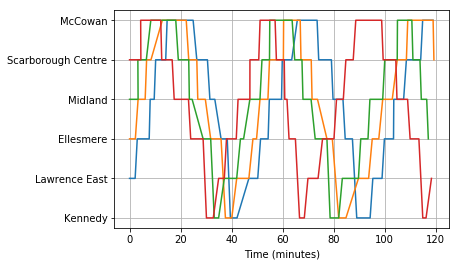

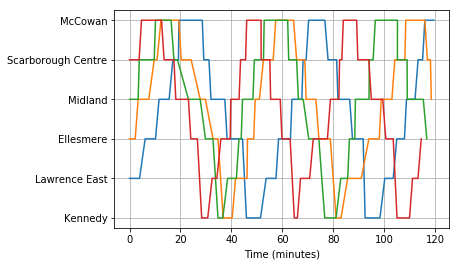

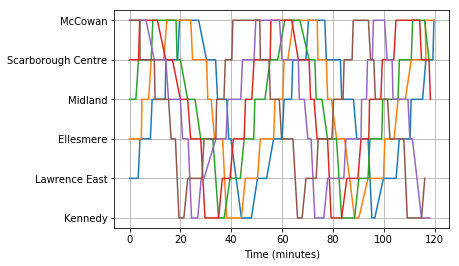

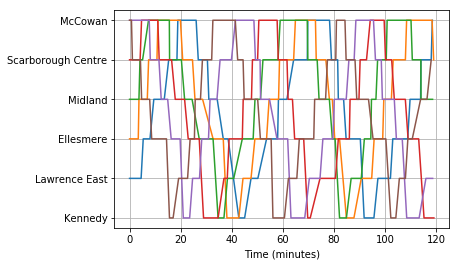

In [25]:
for path in ['Scheduler_ExpFrame4TrainsNoDelays.log', 'Scheduler_ExpFrame4TrainsWithDelays.log', 
             'Scheduler_ExpFrame6TrainsNoDelays.log', 'Scheduler_ExpFrame6TrainsWithDelays.log']:
    data = np.genfromtxt(os.path.join('../data', path),skip_header=1,dtype=None)
    name, ext = os.path.splitext(path)
    psd.plotSchedule(name, data)

In [17]:
plot